In [3]:
import anndata
import scanpy as sc
import scanpy
import numpy as np
import os

TREATED_LABEL = "S2"

In [4]:
filename = "tgfb1-4-" + TREATED_LABEL + ".h5ad"
filename = os.path.join("write", filename)
adata = anndata.read(filename)

In [5]:
adata

AnnData object with n_obs × n_vars = 7047 × 7176 
    obs: 'batch', 'cellular_barcode', 'n_counts', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC signature'
    var: 'gene_names', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'spliced', 'unspliced'

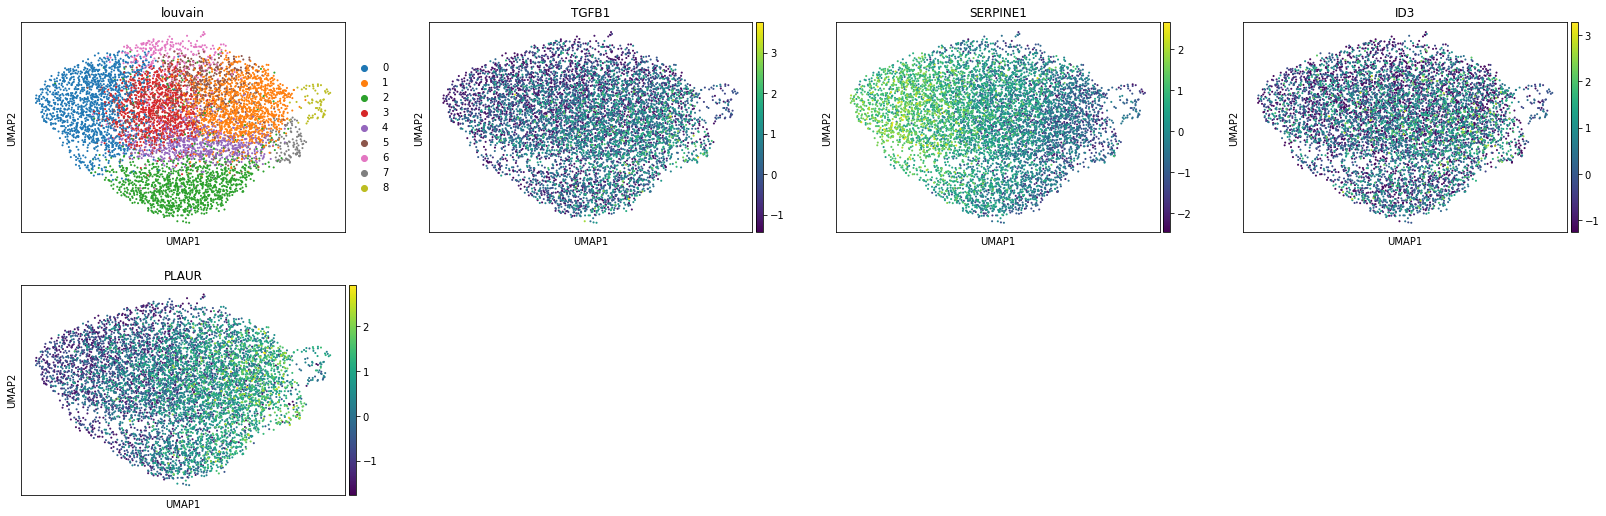

In [6]:
sc.pl.umap(adata, color=['louvain', 'TGFB1', 'SERPINE1', 'ID3', 'PLAUR'])

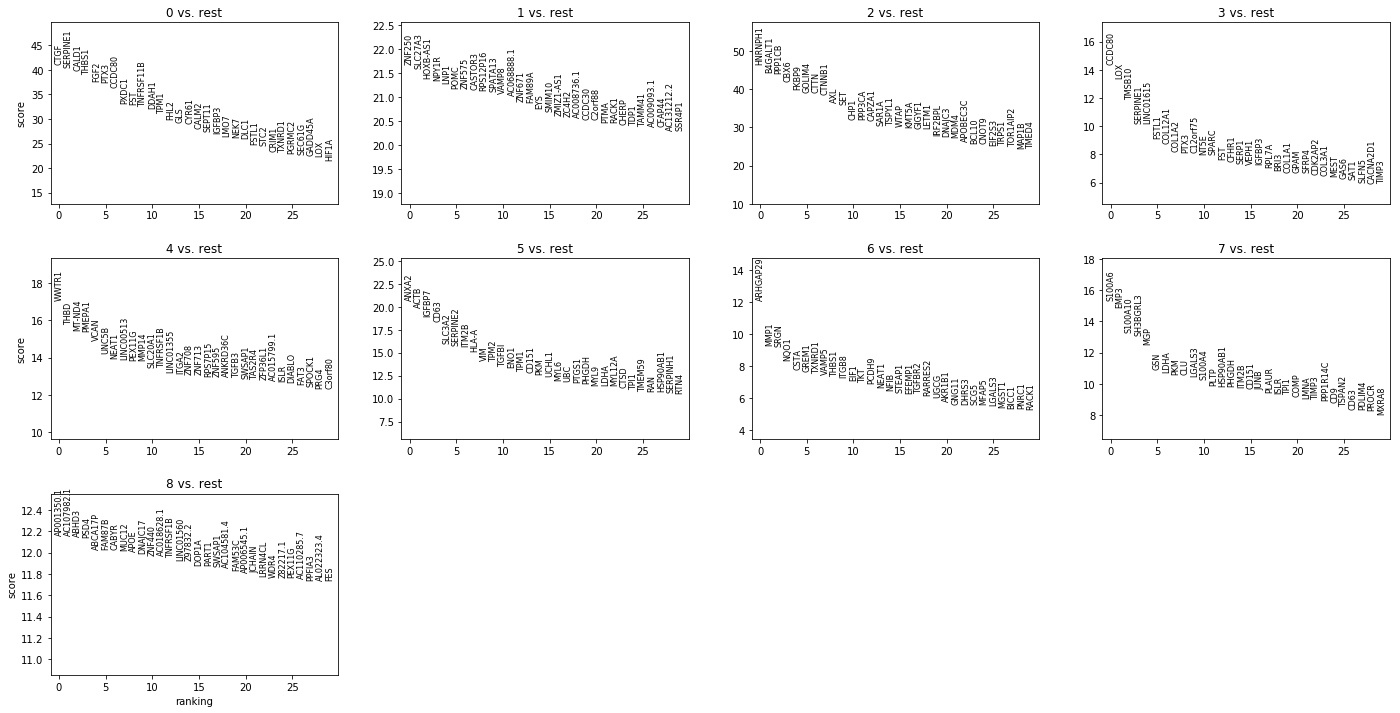

In [7]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon', corr_method="benjamini-hochberg", n_genes=100)
sc.pl.rank_genes_groups(adata, n_genes=30, sharey=False)

In [8]:
cluster_no = 7
n = 100
pvals_adj = np.array(adata.uns['rank_genes_groups']['pvals_adj'].tolist()).T[cluster_no][:n].tolist()
names = np.array(adata.uns['rank_genes_groups']['names'].tolist()).T[cluster_no][:n].tolist()
genes = list(zip(names, pvals_adj))

In [9]:
for i, j in genes:
    print(i)

S100A6
EMP3
S100A10
SH3BGRL3
MGP
GSN
LDHA
PKM
CLU
LGALS3
S100A4
PLTP
HSP90AB1
PHGDH
ITM2B
CD151
JUNB
PLAUR
ISLR
TPI1
COMP
LMNA
TIMP3
PPP1R14C
CD9
TSPAN2
CD63
PDLIM4
PROCR
MXRA8
HLA-A
CRYAB
PCOLCE
IGFBP5
ENO1
SCX
SNX9
ANKH
WLS
EYS
HSP90AA1
ZNF671
PILRB
SLC3A2
DNAJA1
CHERP
LTBP1
PRSS3
CDH6
CASTOR3
SLC27A3
ZNF575
CEP85
FOS
VWCE
AC112198.2
ZNF185
TMEM217
AL353796.1
SPATA13
S1PR3
DCLK1
AP003469.4
LINC01426
P4HTM
ACAD9
AP000254.1
PCDH7
GPRC5A
NANOS1
KDELR3
ANXA2
HOXB-AS1
CHMP1B2P
STMN2
C2orf88
SMIM14
AC074141.1
CDKN3
IER2
TTC12
APOBEC3G
MAST4-AS1
LBX2
GPD1L
CAV1
CADM1
ANKMY1
ZNF680
RPS12P16
GKAP1
FOXC1
LRRC45
N4BP2L1
LINC00886
PCDH17
ZNF813
SLC25A12
POMC
NFE4


In [10]:
cluster_no = 8
n = 100
pvals_adj = np.array(adata.uns['rank_genes_groups']['pvals_adj'].tolist()).T[cluster_no][:n].tolist()
names = np.array(adata.uns['rank_genes_groups']['names'].tolist()).T[cluster_no][:n].tolist()
genes = list(zip(names, pvals_adj))

In [11]:
for i, j in genes:
    print(i)

AP001350.1
AC107982.1
ABHD3
PSD4
ABCA17P
FAM87B
CABYR
MUC12
APOE
DNAJC17
ZNF440
AC018628.1
TNFRSF1B
LINC01560
Z97832.2
DOP1A
PART1
SWSAP1
AC104581.4
FAM53C
AP006545.1
JCHAIN
LRRN4CL
WDR4
Z82217.1
PEX11G
AC110285.7
PPFIA3
AL022323.4
FES
AL645924.2
GTF2IP12
SLC18B1
AC015871.3
AC005070.3
ZNF708
FBXO36
RPS7P15
LINC00513
PLEKHN1
PDGFD
FSD1L
WNT2B
LPAR6
LINC01355
B4GALNT1
AL031320.2
AC026356.1
AC012358.1
AC096775.1
ANG
SOX5
TAS2R4
NINJ2
AC124319.4
AC007750.1
EVI2A
DRG2
AC011498.7
LINC00536
MMP11
PCDHGA12
ZNF713
LATS2-AS1
CEP162
AC004812.2
ARIH2OS
AC015799.1
GPR82
TOE1
AL008638.6
AP000766.1
WFDC3
DBF4B
WDR73
PTPN22
AC109326.1
IL7
MED18
GPKOW
AL359694.2
OS9
ZCCHC18
PCSK1
HHEX
RAET1G
FAT3
PINX1
C12orf4
ANO1
AL022311.1
NTS
ZUP1
ZFP1
ZNF85
DDX39B
NR4A1
MFSD4B
CENPQ
MILR1


In [12]:
[key for key in adata.uns['rank_genes_groups']['logfoldchanges']]

[(1.908837, 2.0056396, 2.2035775, 2.5463994, 2.958996, 3.5396585, 4.422414, 5.722299, 6.7029037),
 (1.9088337, 2.0056374, 2.2035794, 2.546398, 2.9589992, 3.5396585, 4.4224143, 5.722299, 6.7029624),
 (1.9088379, 2.0056365, 2.2035785, 2.5463974, 2.9589994, 3.5396574, 4.4224157, 5.7223024, 6.7029166),
 (1.9088353, 2.005638, 2.203577, 2.546399, 2.9589987, 3.5396557, 4.422412, 5.7223015, 6.7029667),
 (1.9088364, 2.0056314, 2.203579, 2.5464017, 2.9589972, 3.5396585, 4.4224124, 5.722298, 6.702898),
 (1.9088364, 2.0056298, 2.2035773, 2.5463994, 2.958998, 3.5396583, 4.4224153, 5.722297, 6.702946),
 (1.9088362, 2.0056336, 2.2035782, 2.5464, 2.9589987, 3.5396593, 4.422412, 5.722301, 6.706625),
 (1.9088389, 2.0056305, 2.2035785, 2.546399, 2.958994, 3.5396578, 4.4224114, 5.7223, 6.7029285),
 (1.908841, 2.005635, 2.2035818, 2.5463994, 2.959006, 3.539662, 4.422416, 5.7223024, 6.7029233),
 (1.9088356, 2.0056822, 2.203577, 2.5464013, 2.958998, 3.5396605, 4.4224124, 5.7222996, 6.7029157),
 (1.9088343, 2

In [13]:
cluster_no = 1
n = 100
pvals_adj = np.array(adata.uns['rank_genes_groups']['logfoldchanges'].tolist()).T[cluster_no][:n].tolist()
names = np.array(adata.uns['rank_genes_groups']['names'].tolist()).T[cluster_no][:n].tolist()
genes = list(zip(names, pvals_adj))

In [14]:
genes.sort(key=lambda i: i[1], reverse=True)

In [15]:
for i, j in genes:
    if j > 1:
        print(i, j)

RBBP9 2.005709171295166
SPATA13 2.0056822299957275
ACTRT3 2.0056567192077637
ZNF229 2.005652904510498
CHERP 2.0056467056274414
AC135050.7 2.0056464672088623
MMP19 2.005645275115967
AC009093.1 2.005642890930176
MMACHC 2.0056421756744385
C2orf88 2.005641460418701
VWCE 2.005641222000122
ZNF250 2.0056395530700684
AC009779.2 2.0056393146514893
ZMIZ1-AS1 2.005638837814331
TMEM204 2.005638837814331
C10orf25 2.005638837814331
DBP 2.005638599395752
TAB1 2.005638599395752
PNMA8A 2.005638599395752
AC008280.3 2.005638599395752
BMP4 2.005638599395752
ZNF185 2.005638360977173
BHMT2 2.005638360977173
IDNK 2.005638360977173
TAMM41 2.0056381225585938
PCSK9 2.0056381225585938
ACP6 2.0056381225585938
NPY1R 2.0056378841400146
VAMP8 2.0056378841400146
LRP8 2.0056378841400146
RACK1 2.0056376457214355
ZNF529-AS1 2.0056376457214355
SLC27A3 2.0056374073028564
AC124798.1 2.0056374073028564
FAM21FP 2.0056374073028564
ADGRG1 2.0056374073028564
NANOS1 2.0056371688842773
JUP 2.0056371688842773
TDP1 2.00563693046569

In [16]:
for i, j in genes:
    if j < -1:
        print(i, j)

In [17]:
cluster_no = 3
n = 100
pvals_adj = np.array(adata.uns['rank_genes_groups']['pvals_adj'].tolist()).T[cluster_no][:n].tolist()
names = np.array(adata.uns['rank_genes_groups']['names'].tolist()).T[cluster_no][:n].tolist()
genes = list(zip(names, pvals_adj))

In [18]:
for i, j in genes:
    print(i)

CCDC80
LOX
TMSB10
SERPINE1
LINC01615
FSTL1
COL12A1
COL1A2
PTX3
C12orf75
NT5E
SPARC
FST
CFHR1
SERP1
VEPH1
IGFBP3
RPL7A
BRI3
COL1A1
GPAM
SFRP4
CDK2AP2
COL3A1
MEST
GAS6
SAT1
SLFN5
CACNA2D1
TIMP3
CYP1B1
CDH2
MT-CO3
TMEM167A
PRNP
MT2A
CCND2
CDH13
HSPA5
NEAT1
SEC61G
FGF2
NRP1
GFPT1
COL5A1
EPDR1
PIGB
EFEMP1
COL15A1
GAS8
EPAS1
MAP1LC3B
GPRASP1
POLR3G
MT-ND4
AL357507.1
AC007405.3
FMOD
DNAJB9
SNHG8
ANXA1
SCN8A
SLC29A3
NLGN4Y
SEPHS2
SPX
FILIP1
LNX2
TRIM7
AL109615.3
ZNF33B
ZKSCAN2-DT
SLC7A11
ARHGAP5-AS1
IL1RL1
DICER1-AS1
TNFSF13B
WDPCP
MICAL2
IGFN1
CCDC24
SGCG
TEX26-AS1
VDR
AQP1
COL5A2
FAM151B
MIR22HG
SCML1
VAX2
RFX5
MGAT5
AC011978.2
HIST2H2AA3
NEK7
AC010300.1
DKK1
AC005790.1
LINC01133
HEY1
